In [2]:
%pip install -U seaborn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [37]:
%pip uninstall botocore -y
%pip install -q 'botocore==1.22.5'



/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Found existing installation: botocore 1.22.5
Uninstalling botocore-1.22.5:
  Successfully uninstalled botocore-1.22.5
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [23]:
#import the libraries that we will use
import s3fs
import sagemaker
import pandas as pd

In [24]:
#Now that it is there, in the future you can 
df = pd.read_csv('final.csv')



In [25]:
df.head()

,Unnamed: 0,Date,Count_Crashes,Count_Fatalities,text,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover,conditions,description
0,0,2016-01-01,0.0,0,NaN,3.5,19.8,0.00,0.0,7.06,40.3,9.1,0.009,Clear,Clear conditions throughout the day.
1,1,2016-01-02,0.0,0,NaN,4.6,23.5,0.00,0.0,7.02,33.3,7.7,0.623,Partially cloudy,Partly cloudy throughout the day.
2,2,2016-01-03,0.0,0,NaN,19.1,26.2,0.00,0.0,6.73,34.4,5.8,0.834,Partially cloudy,Partly cloudy throughout the day.
3,3,2016-01-04,1.0,1,NaN,18.2,30.0,0.00,0.0,6.48,28.9,7.9,0.823,Partially cloudy,Partly cloudy throughout the day.
4,4,2016-01-05,0.0,0,NaN,27.3,38.4,0.01,0.0,6.03,0.0,14.1,0.930,"Snow, Overcast",Cloudy skies throughout the day with morning r...


In [26]:
df.describe()

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000
mean,914.000000,0.179333,0.186987,45.921432,64.986605,0.038475,0.206736,0.905719,19.912794,15.258885,0.497685
std,528.131139,0.415232,0.441334,16.978112,21.186750,0.116821,0.723625,1.970992,14.955337,5.806047,0.234256
min,0.000000,0.000000,0.000000,-4.000000,14.900000,0.000000,0.000000,0.000000,0.000000,4.900000,0.000000
25%,457.000000,0.000000,0.000000,31.900000,47.500000,0.000000,0.000000,0.000000,0.000000,10.800000,0.322000
50%,914.000000,0.000000,0.000000,44.400000,63.800000,0.000000,0.000000,0.000000,23.000000,13.800000,0.508000
75%,1371.000000,0.000000,0.000000,60.800000,84.600000,0.010000,0.000000,0.460000,31.100000,18.600000,0.673000
max,1828.000000,3.000000,3.000000,80.800000,103.800000,2.040000,9.840000,10.640000,68.000000,41.300000,0.985000


In [27]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
Precipitation       5.742464
snow                5.675078
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
dtype: float64

In [28]:
#adjust Snow for Skew
df['snowRecip'] = 1/(df['snow']+.01) 
df['snowRT'] =df['snow']**(1/10)
df['snowSQRT'] =df['snow']**(1/2)
import numpy as np
df['snowNLog'] = np.log(df['snow']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0          0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
Precipitation       5.742464
snow                5.675078
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
snowRecip          -1.818635
snowRT              1.864092
snowSQRT            2.948471
snowNLog            2.081146
dtype: float64

In [29]:
#Drop all of the columns execpt for the least skewed - snowRecip - snow reciprocal
df.drop('snowNLog', axis=1, inplace = True)
df.drop('snow', axis=1, inplace = True)
df.drop('snowSQRT', axis=1, inplace = True)
df.drop('snowRT', axis=1, inplace = True)

In [30]:
#adjust Precipitation for skew
df['PrecipitationRecip'] = 1/(df['Precipitation']+.01) 
df['PrecipitationRT'] =df['Precipitation']**(1/10)
df['PrecipitationSQRT'] =df['Precipitation']**(1/2)
import numpy as np
df['PrecipitationNLog'] = np.log(df['Precipitation']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0            0.000000
Count_Crashes         2.232752
Count_Fatalities      2.435642
Low                   0.124840
High                  0.010993
Precipitation         5.742464
snowdepth             2.503287
windgust             -0.172550
windspeed             0.959174
cloudcover           -0.069241
snowRecip            -1.818635
PrecipitationRecip   -1.311481
PrecipitationRT       1.226895
PrecipitationSQRT     2.462225
PrecipitationNLog     1.905154
dtype: float64

In [31]:
#Drop all of the columns execpt for the least skewed - PrecipitationRT 
df.drop('Precipitation', axis=1, inplace = True)
df.drop('PrecipitationRecip', axis=1, inplace = True)
df.drop('PrecipitationSQRT', axis=1, inplace = True)
df.drop('PrecipitationNLog', axis=1, inplace = True)

In [32]:
#adjust snowdepth for skew
df['snowdepthRecip'] = 1/(df['snowdepth']+.01) 
df['snowdepthRT'] =df['snowdepth']**(1/3)
df['snowdepthSQRT'] =df['snowdepth']**(1/2)
import numpy as np
df['snowdepthNLog'] = np.log(df['snowdepth']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


Unnamed: 0          0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
snowdepth           2.503287
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
snowdepthRT         1.333288
snowdepthSQRT       1.615330
snowdepthNLog       1.128915
dtype: float64

In [33]:
#Drop all of the columns execpt for the least skewed 
df.drop('snowdepth', axis=1, inplace = True)
df.drop('snowdepthRT', axis=1, inplace = True)
df.drop('snowdepthSQRT', axis=1, inplace = True)
df.drop('snowdepthNLog', axis=1, inplace = True)

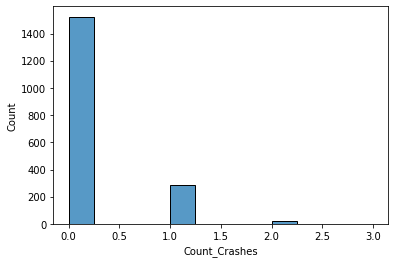

In [34]:
import seaborn as sns
sns.histplot(df['Count_Crashes']);

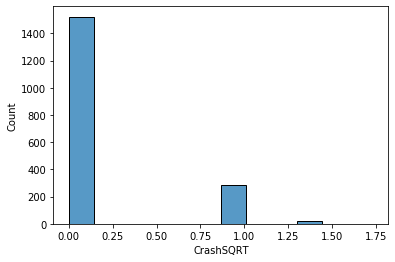

In [35]:
df['CrashSQRT'] =df['Count_Crashes']**(1/2)
sns.histplot(df['CrashSQRT']);

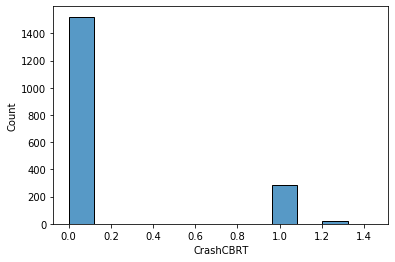

In [36]:
df['CrashCBRT'] =df['Count_Crashes']**(1/3)
sns.histplot(df['CrashCBRT']);

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


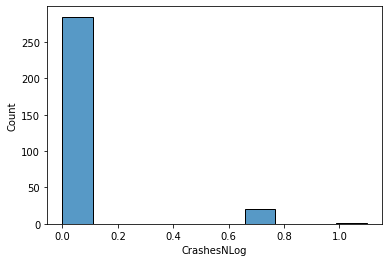

In [37]:
import numpy as np
df['CrashesNLog'] = np.log(df['Count_Crashes'])
sns.histplot(df['CrashesNLog']);

In [38]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
CrashSQRT           1.852040
CrashCBRT           1.809447
CrashesNLog              NaN
dtype: float64

In [39]:
df.head()

,Unnamed: 0,Date,Count_Crashes,Count_Fatalities,text,Low,High,windgust,windspeed,cloudcover,conditions,description,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
0,0,2016-01-01,0.0,0,NaN,3.5,19.8,40.3,9.1,0.009,Clear,Clear conditions throughout the day.,100.0,0.000000,0.141443,0.0,0.0,-inf
1,1,2016-01-02,0.0,0,NaN,4.6,23.5,33.3,7.7,0.623,Partially cloudy,Partly cloudy throughout the day.,100.0,0.000000,0.142248,0.0,0.0,-inf
2,2,2016-01-03,0.0,0,NaN,19.1,26.2,34.4,5.8,0.834,Partially cloudy,Partly cloudy throughout the day.,100.0,0.000000,0.148368,0.0,0.0,-inf
3,3,2016-01-04,1.0,1,NaN,18.2,30.0,28.9,7.9,0.823,Partially cloudy,Partly cloudy throughout the day.,100.0,0.000000,0.154083,1.0,1.0,0.0
4,4,2016-01-05,0.0,0,NaN,27.3,38.4,0.0,14.1,0.930,"Snow, Overcast",Cloudy skies throughout the day with morning r...,100.0,0.630957,0.165563,0.0,0.0,-inf


In [40]:
 df.corr()

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
Unnamed: 0,1.000000,0.010769,0.010071,-0.003690,0.008537,-0.047560,-0.073456,-0.184307,0.009661,-0.069210,0.042683,0.003845,0.001941,0.104238
Count_Crashes,0.010769,1.000000,0.978138,0.050893,0.064582,-0.009549,-0.003702,-0.043735,0.028610,-0.057082,0.035006,0.988222,0.980777,0.996585
Count_Fatalities,0.010071,0.978138,1.000000,0.049730,0.061686,-0.006380,0.002746,-0.036987,0.024474,-0.053848,0.029831,0.968221,0.961374,0.768285
Low,-0.003690,0.050893,0.049730,1.000000,0.957637,0.381878,0.267521,-0.280782,0.438265,-0.188899,0.650331,0.048245,0.047281,0.066618
High,0.008537,0.064582,0.061686,0.957637,1.000000,0.365823,0.222397,-0.427306,0.480581,-0.279045,0.690554,0.059977,0.058430,0.101399
windgust,-0.047560,-0.009549,-0.006380,0.381878,0.365823,1.000000,0.679555,0.057852,0.083159,0.148923,0.221960,-0.008092,-0.007604,-0.032684
windspeed,-0.073456,-0.003702,0.002746,0.267521,0.222397,0.679555,1.000000,0.278871,-0.063069,0.259883,0.079585,-0.004518,-0.004796,0.018897
cloudcover,-0.184307,-0.043735,-0.036987,-0.280782,-0.427306,0.057852,0.278871,1.000000,-0.380841,0.487375,-0.398116,-0.033860,-0.031007,-0.169192
snowRecip,0.009661,0.028610,0.024474,0.438265,0.480581,0.083159,-0.063069,-0.380841,1.000000,-0.376925,0.719048,0.024811,0.023637,0.075951
PrecipitationRT,-0.069210,-0.057082,-0.053848,-0.188899,-0.279045,0.148923,0.259883,0.487375,-0.376925,1.000000,-0.271011,-0.054581,-0.053652,-0.071850


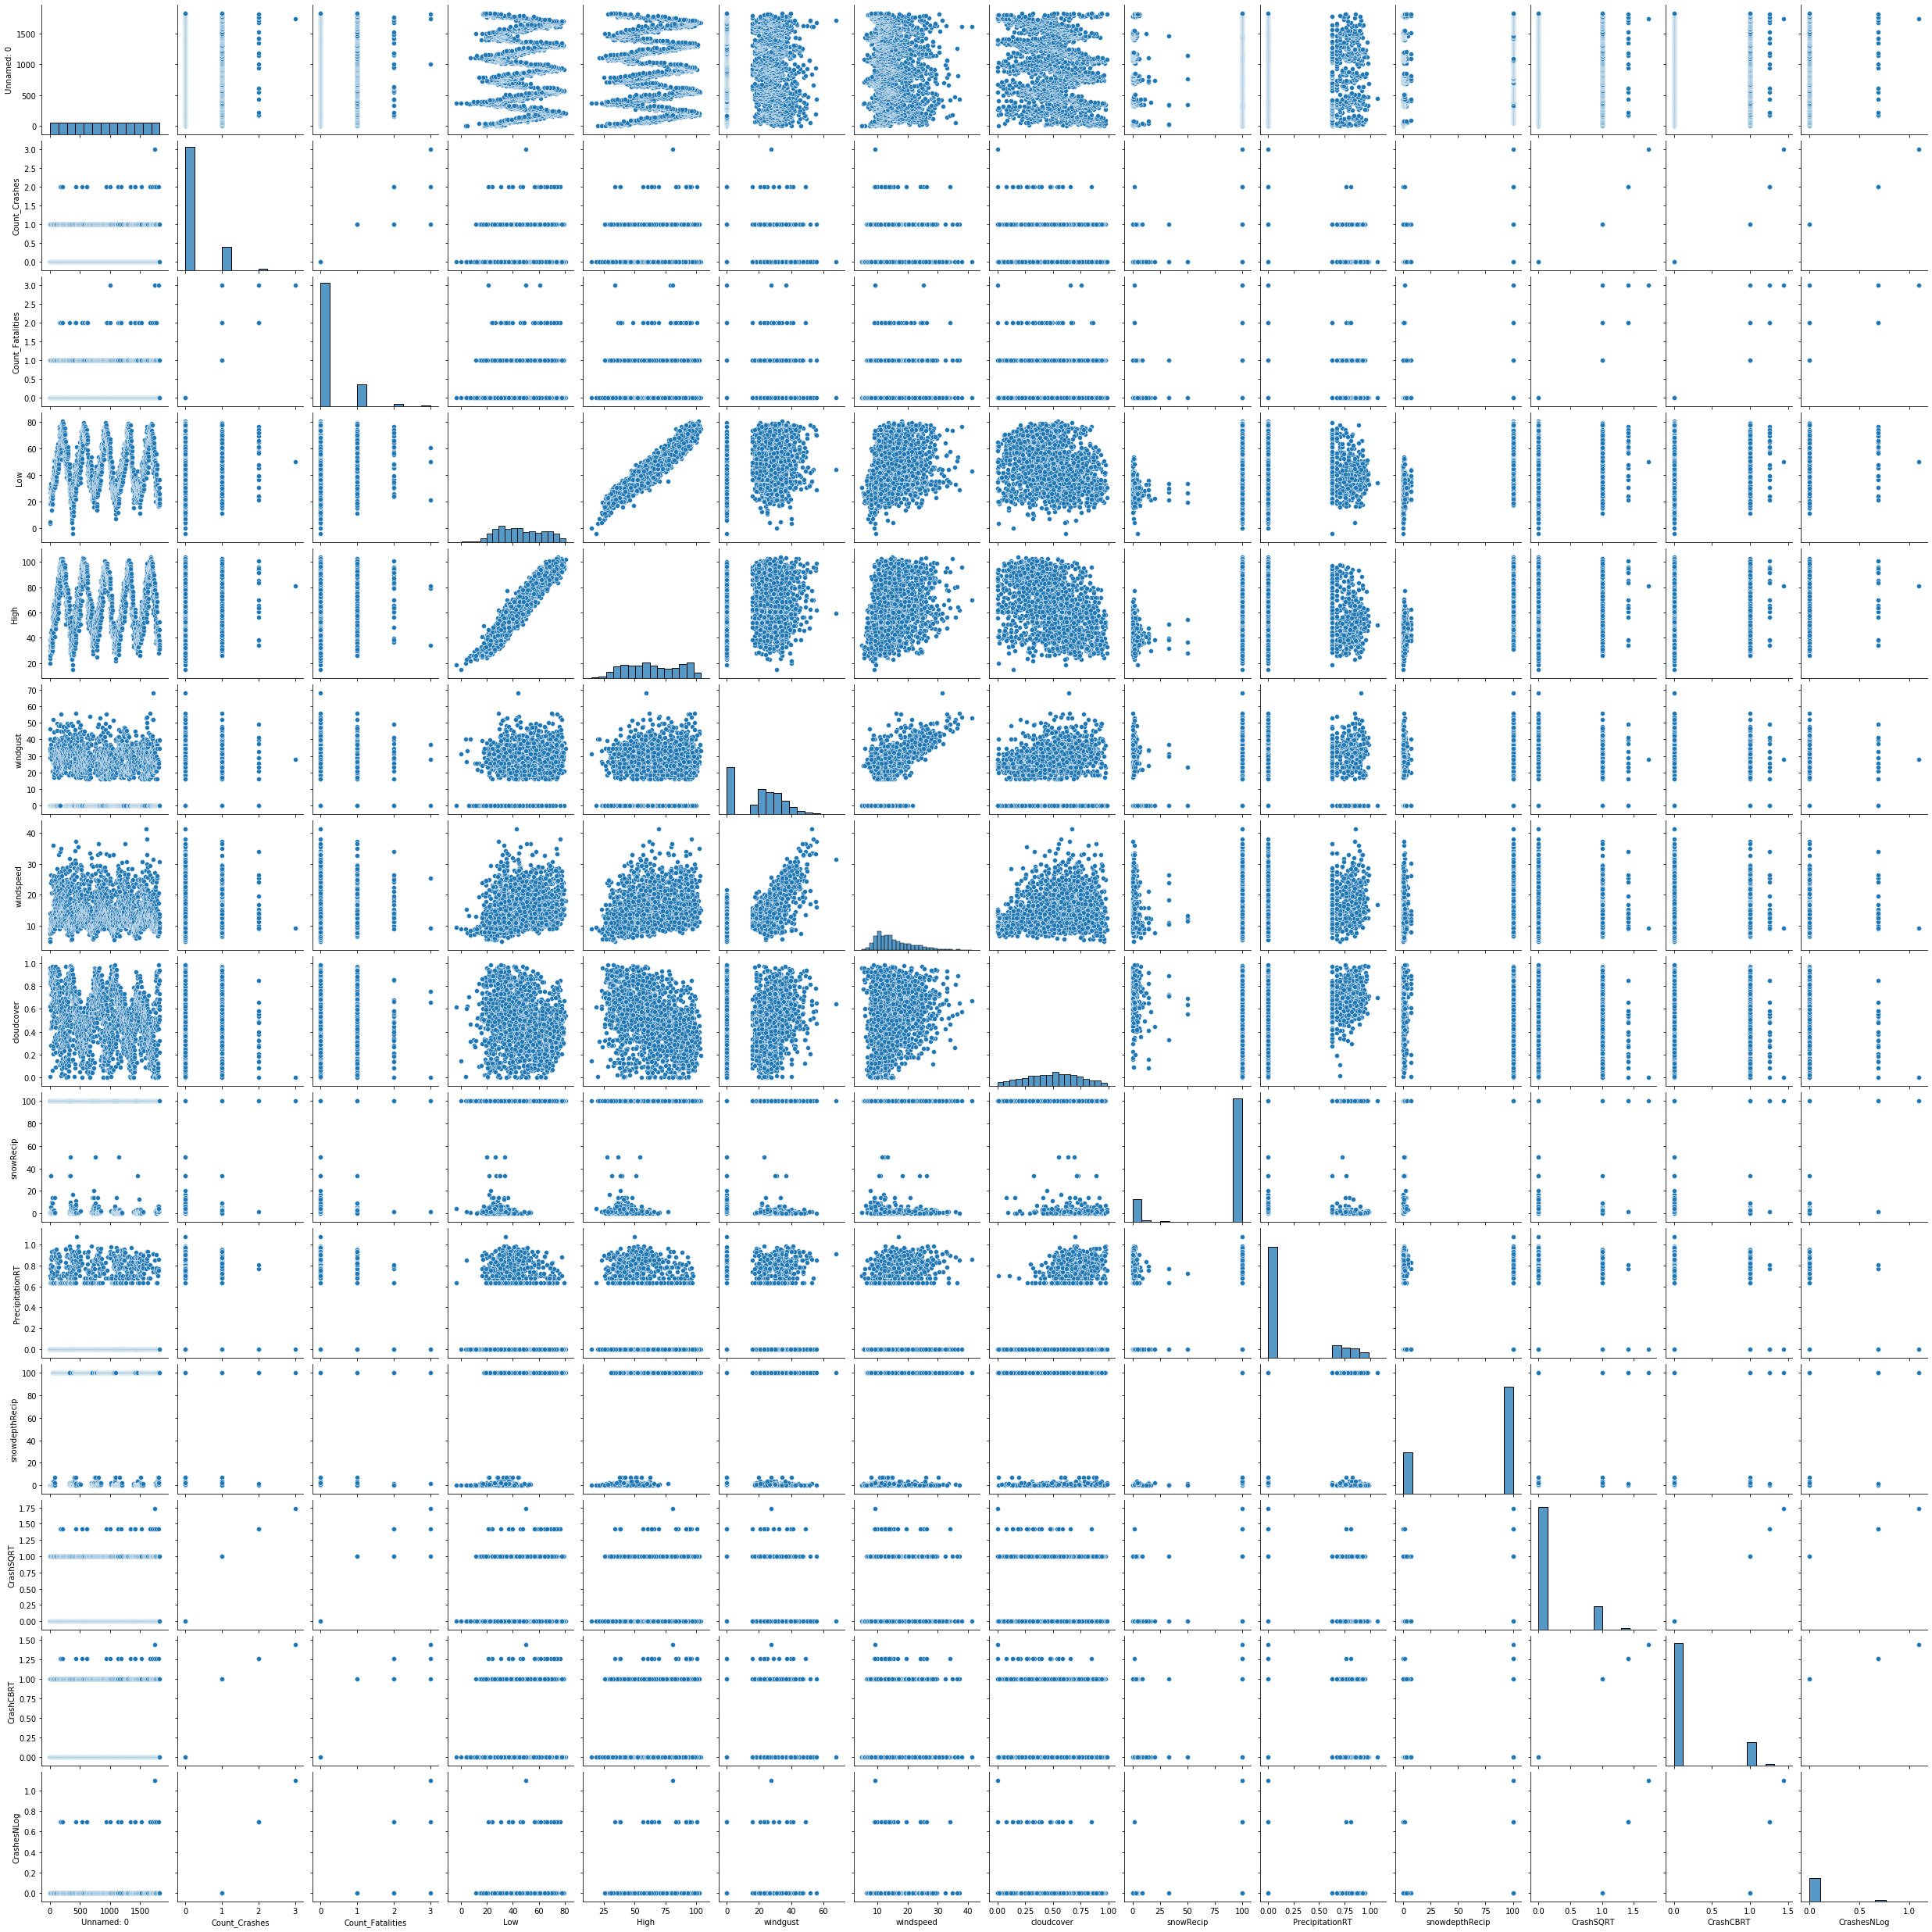

In [41]:
import seaborn as sns
sns.pairplot(df);

In [38]:
#df['windgust'] = df['windgust'].fillna(0)

In [43]:
df_dummies=df.copy()

for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df_dummies=pd.get_dummies(df_dummies, columns=[col], drop_first=True)

df_dummies.head()


,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,...,description_Partly cloudy throughout the day with late afternoon snow.,description_Partly cloudy throughout the day with morning rain.,description_Partly cloudy throughout the day with morning snow.,description_Partly cloudy throughout the day with rain clearing later.,description_Partly cloudy throughout the day with rain in the morning and afternoon.,description_Partly cloudy throughout the day with rain.,description_Partly cloudy throughout the day with snow clearing later.,description_Partly cloudy throughout the day with snow in the morning and afternoon.,description_Partly cloudy throughout the day with snow.,description_Partly cloudy throughout the day.
0,0,0.0,0,3.5,19.8,40.3,9.1,0.009,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,4.6,23.5,33.3,7.7,0.623,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,2,0.0,0,19.1,26.2,34.4,5.8,0.834,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1,18.2,30.0,28.9,7.9,0.823,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,4,0.0,0,27.3,38.4,0.0,14.1,0.930,100.0,0.630957,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_dummies

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,...,description_Partly cloudy throughout the day with late afternoon snow.,description_Partly cloudy throughout the day with morning rain.,description_Partly cloudy throughout the day with morning snow.,description_Partly cloudy throughout the day with rain clearing later.,description_Partly cloudy throughout the day with rain in the morning and afternoon.,description_Partly cloudy throughout the day with rain.,description_Partly cloudy throughout the day with snow clearing later.,description_Partly cloudy throughout the day with snow in the morning and afternoon.,description_Partly cloudy throughout the day with snow.,description_Partly cloudy throughout the day.
0,0,0.0,0,3.5,19.8,40.3,9.1,0.009,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,4.6,23.5,33.3,7.7,0.623,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,2,0.0,0,19.1,26.2,34.4,5.8,0.834,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1,18.2,30.0,28.9,7.9,0.823,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,4,0.0,0,27.3,38.4,0.0,14.1,0.930,100.0,0.630957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1824,0.0,0,23.1,37.9,0.0,9.3,0.684,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1825,1825,0.0,0,21.9,34.8,39.7,13.1,0.845,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1826,1826,0.0,0,18.0,32.0,34.4,7.9,0.322,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1827,1827,1.0,1,19.0,32.9,0.0,13.7,0.592,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [45]:
%pip install --upgrade numpy
%pip install --upgrade pandas

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should conside

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regression algorithm
from sklearn.ensemble import GradientBoostingRegressor # Import XGBoost algorithm 
from sklearn.model_selection import train_test_split

In [48]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0          0.000000
Count_Crashes       2.232752
Count_Fatalities    2.435642
Low                 0.124840
High                0.010993
windgust           -0.172550
windspeed           0.959174
cloudcover         -0.069241
snowRecip          -1.818635
PrecipitationRT     1.226895
snowdepthRecip     -0.996990
CrashSQRT           1.852040
CrashCBRT           1.809447
CrashesNLog              NaN
dtype: float64

In [60]:
y = df.Count_Crashes # Label
X = df.drop(columns=['Count_Crashes']) # Features
X = df.drop(columns=['CrashesNLog'])
X = X.select_dtypes(np.number)
X.head()

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT
0,0,0.0,0,3.5,19.8,40.3,9.1,0.009,100.0,0.000000,0.141443,0.0,0.0
1,1,0.0,0,4.6,23.5,33.3,7.7,0.623,100.0,0.000000,0.142248,0.0,0.0
2,2,0.0,0,19.1,26.2,34.4,5.8,0.834,100.0,0.000000,0.148368,0.0,0.0
3,3,1.0,1,18.2,30.0,28.9,7.9,0.823,100.0,0.000000,0.154083,1.0,1.0
4,4,0.0,0,27.3,38.4,0.0,14.1,0.930,100.0,0.630957,0.165563,0.0,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.head()

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT
636,636,1.0,1,45.9,68.8,30.0,13.8,0.196,100.000000,0.000000,100.000000,1.0,1.0
1201,1201,0.0,0,43.9,61.8,20.8,14.9,0.712,100.000000,0.000000,100.000000,0.0,0.0
401,401,0.0,0,41.5,53.8,26.4,15.7,0.577,3.225806,0.630957,0.220264,0.0,0.0
154,154,0.0,0,61.8,87.8,26.2,15.7,0.496,100.000000,0.630957,100.000000,0.0,0.0
1340,1340,1.0,1,68.4,94.7,19.7,11.1,0.146,100.000000,0.000000,100.000000,1.0,1.0


In [62]:
df.columns[df.isna().any()]

Index(['text'], dtype='object')

In [63]:
clf = DecisionTreeRegressor()

In [67]:
clf = clf.fit(X_train,y_train)

In [68]:
y_pred = clf.predict(X_test)

In [69]:
df_dummies

,Unnamed: 0,Count_Crashes,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,...,description_Partly cloudy throughout the day with late afternoon snow.,description_Partly cloudy throughout the day with morning rain.,description_Partly cloudy throughout the day with morning snow.,description_Partly cloudy throughout the day with rain clearing later.,description_Partly cloudy throughout the day with rain in the morning and afternoon.,description_Partly cloudy throughout the day with rain.,description_Partly cloudy throughout the day with snow clearing later.,description_Partly cloudy throughout the day with snow in the morning and afternoon.,description_Partly cloudy throughout the day with snow.,description_Partly cloudy throughout the day.
0,0,0.0,0,3.5,19.8,40.3,9.1,0.009,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0,4.6,23.5,33.3,7.7,0.623,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,2,0.0,0,19.1,26.2,34.4,5.8,0.834,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,3,1.0,1,18.2,30.0,28.9,7.9,0.823,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,4,0.0,0,27.3,38.4,0.0,14.1,0.930,100.0,0.630957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,1824,0.0,0,23.1,37.9,0.0,9.3,0.684,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1825,1825,0.0,0,21.9,34.8,39.7,13.1,0.845,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1826,1826,0.0,0,18.0,32.0,34.4,7.9,0.322,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
1827,1827,1.0,1,19.0,32.9,0.0,13.7,0.592,100.0,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [74]:
import statsmodels.api as sm
y = df_dummies['Count_Crashes']

In [75]:
X = df_dummies.drop(columns=['Count_Crashes'])

In [76]:
X['const'] = 1 ## allows you to get the y intercept , quirk of the stats package 

In [77]:
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: On entry to DLASCL parameter number 4 had an illegal value

In [78]:
%pip install -U sklearn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.model_selection import train_test_split
X.drop(columns=['const'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train.head()

,Unnamed: 0,Count_Fatalities,Low,High,windgust,windspeed,cloudcover,snowRecip,PrecipitationRT,snowdepthRecip,...,description_Partly cloudy throughout the day with late afternoon snow.,description_Partly cloudy throughout the day with morning rain.,description_Partly cloudy throughout the day with morning snow.,description_Partly cloudy throughout the day with rain clearing later.,description_Partly cloudy throughout the day with rain in the morning and afternoon.,description_Partly cloudy throughout the day with rain.,description_Partly cloudy throughout the day with snow clearing later.,description_Partly cloudy throughout the day with snow in the morning and afternoon.,description_Partly cloudy throughout the day with snow.,description_Partly cloudy throughout the day.
1162,1162,0,43.8,50.9,34.5,26.1,0.610,100.0,0.827197,7.142857,...,0,0,0,0,0,1,0,0,0,0
1213,1213,0,56.9,73.5,35.8,18.2,0.603,100.0,0.676243,100.000000,...,0,0,0,0,0,0,0,0,0,0
1321,1321,0,62.6,84.4,20.8,11.2,0.083,100.0,0.000000,100.000000,...,0,0,0,0,0,0,0,0,0,0
1245,1245,0,48.7,62.5,18.3,9.5,0.579,100.0,0.925286,100.000000,...,0,0,0,1,0,0,0,0,0,0
138,138,0,54.9,68.9,34.0,16.0,0.713,100.0,0.000000,100.000000,...,0,0,0,0,0,0,0,0,0,1


In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dtr = DecisionTreeRegressor(random_state=12345).fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [59]:
dtr.score(X_test, y_test)

0.9999858723086168

In [82]:
df_predict = pd.DataFrame({'Actual':y_test, 'Predicted':dtr.predict(X_test)})
df_predict.head()

NameError: name 'dtr' is not defined

In [61]:
np.exp(df_predict)

,Actual,Predicted
172,1.358143e+75,3.691814e+75
521,5.031756e+226,1.851080e+226
836,inf,inf
2278,inf,inf
413,6.279362e+179,4.639856e+180
...,...,...
738,inf,inf
1647,inf,inf
1202,inf,inf
453,1.478069e+197,1.092154e+198


In [ ]:
import joblib #to publish model
joblib.dump(dtr, 'trained_moedl.sav')